Решить уравнение переноса $u_t + u_x = 0$ схемой Лакса-Вендроффа $$\dfrac{y^{n+1}_m-y^n_m}{\tau}+a\dfrac{y^{n}_{m+1}-y^n_{m-1}}{2h}-a^2\tau\dfrac{y^{n}_{m+1}-2y^n_m+y^n_{m-1}}{2h^2}=0$$ 
С начальными усливями $$u(x,0)=1, 0\leq x\leq 5 $$
$$u(x,0)=0, 5\leq x\leq 20 $$
$$u(0,t)=0, 0\leq t\leq 9 $$

Выражаем $y_m^{n+1}$: $$y^{n+1}_m = y^n_m-a\tau\dfrac{y^{n}_{m+1}-y^n_{m-1}}{2h}+a^2\tau^2\dfrac{y^{n}_{m+1}-2y^n_m+y^n_{m-1}}{2h^2} $$


 $$y^{n+1}_m = \left(1-\dfrac{a^2\tau^2}{h^2}\right)y^n_m+ \dfrac{a\tau}{2h}\left(1+\dfrac{a\tau}{h}\right)y^n_{m-1}- \dfrac{a\tau}{2h}\left(1-\dfrac{a\tau}{h}\right)y^n_{m+1}$$
 
 Решим задачу для разных Чисел Куранта: $$\dfrac{\tau}{h}= k = \{1.0, 0.6, 0.3\}$$ 

In [28]:
import numpy as np 
import math 
#plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

Шаг сетки $h = 0,5$

In [29]:
def solution(k, dx):
    
    T = 9
    dt = k * dx
    h = int(20 / dx)
    n = int(T / dt)
    U = np.zeros((n + 1, h + 1))

    for j in range(h + 1): 
        U[0][j] = 1 if j <= 5/dx else 0

    for i in range(n + 1): 
        U[i][0] = 1 

    a = 1
    l = (a * dt) / (2 * dx)
    A , B, C = 1 - pow(2 * l, 2), l * (1 + 2*l), - l * (1 - 2*l)

    for i in range(n): 
        for j in range(1, h): 
            U[i+1][j] = A * U[i][j] + B * U[i][j-1] + C * U[i][j+1] 
    return U, n, dt

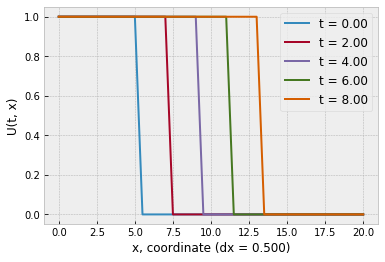

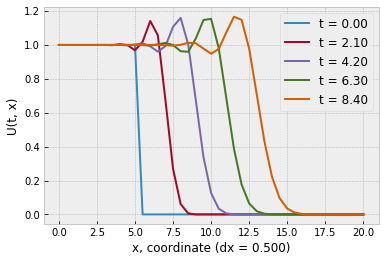

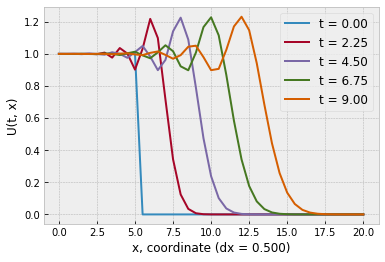

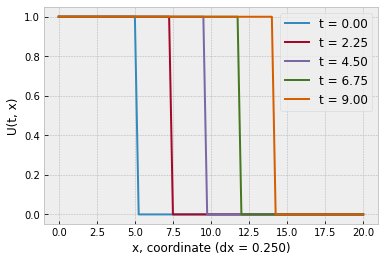

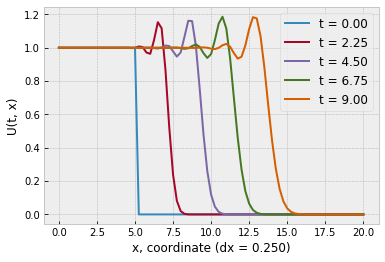

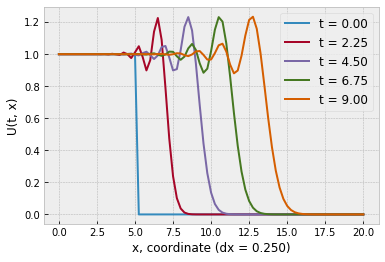

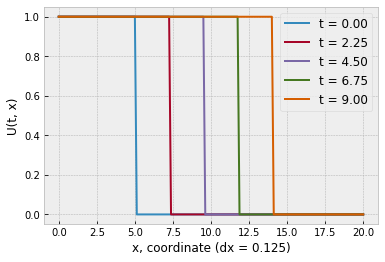

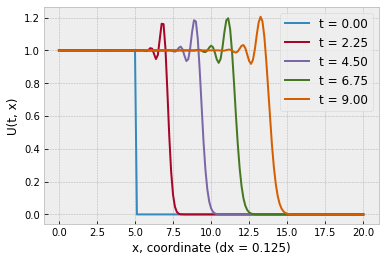

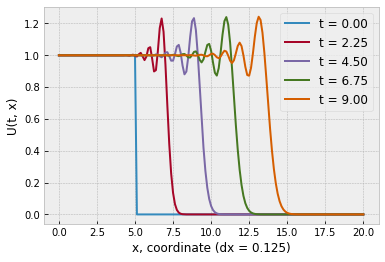

In [31]:
k_values = [1.0, 0.6, 0.3]
dx_values = [0.5, 0.25, 0.125]
for dx in dx_values:
    for k in k_values:
        U, n, dt = solution(k, dx)
        x = np.arange(0, 20.0001, dx)
        for i, y in enumerate(U):
            if i % (n // 4) == 0:
                plt.plot(x, y, label='t = %.2f' %(i*dt))
        plt.xlabel('x, coordinate (dx = %.3f)'%dx)
        plt.ylabel('U(t, x)')
        plt.legend(fontsize='large')
        plt.show()